# Modelo de Machine Learning para clasificar estudiantes con depresión

Dataset tomado de: https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset?resource=download

In [1]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Leer el archivo de datos
df = pd.read_csv('data/student_depression_dataset.csv')

In [3]:
df.sample(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
3988,19948,Male,30.0,Lucknow,Student,1.0,0.0,5.57,4.0,0.0,'5-6 hours',Healthy,LLM,No,7.0,3.0,Yes,0
3412,17086,Male,27.0,Hyderabad,Student,4.0,0.0,9.93,2.0,0.0,'5-6 hours',Moderate,BBA,No,7.0,3.0,Yes,1
5494,27692,Female,26.0,Kanpur,Student,5.0,0.0,9.96,1.0,0.0,'7-8 hours',Healthy,M.Pharm,No,12.0,2.0,No,0
19894,100808,Female,28.0,Vadodara,Student,1.0,0.0,6.27,4.0,0.0,'7-8 hours',Healthy,LLM,Yes,8.0,5.0,No,0
17420,88094,Female,34.0,Ghaziabad,Student,4.0,0.0,5.39,5.0,0.0,'Less than 5 hours',Unhealthy,BSc,Yes,11.0,3.0,Yes,1


In [4]:
df.shape

(27901, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [7]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [10]:
for col in categorical_cols:
    print(f'{col}: {df[col].unique()}')
    print(f'{col}: {df[col].value_counts()}')
    print('---------------------------------')

Gender: ['Male' 'Female']
Gender: Gender
Male      15547
Female    12354
Name: count, dtype: int64
---------------------------------
City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
City: City
Kalyan                  1570
Srinagar                1372
Hyderabad               1340
Vasai-Virar             1290
Lucknow                 1155
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1066
Jaipur                  1036
Patna         

In [11]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [12]:
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')
df['Financial Stress'].fillna(df['Financial Stress'].mean(), inplace=True)

df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.split('-').str[0]
df['Sleep Duration'] = df['Sleep Duration'].str.replace(' hours', '')
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", '')

df['Sleep Duration'] = df['Sleep Duration'].replace({
    "Less than 5": 4,
    "More than 8": 9
})

df['Sleep Duration'] = pd.to_numeric(df['Sleep Duration'], errors='coerce')

In [13]:
df['Sleep Duration']

0        5.0
1        5.0
2        4.0
3        7.0
4        5.0
        ... 
27896    5.0
27897    4.0
27898    5.0
27899    4.0
27900    4.0
Name: Sleep Duration, Length: 27901, dtype: float64

In [14]:
df_C = pd.get_dummies(df, columns=categorical_cols
)
df_C.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Female,...,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Financial Stress_1.0,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_3.1398666571080365,Financial Stress_4.0,Financial Stress_5.0,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1,False,...,False,True,True,False,False,False,False,False,True,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,0,True,...,True,False,False,True,False,False,False,False,False,True
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,0,False,...,True,False,True,False,False,False,False,False,False,True
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,1,True,...,False,True,False,False,False,False,False,True,False,True
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,0,True,...,False,True,True,False,False,False,False,False,True,False


In [15]:
X = df_C.drop('Depression', axis=1)
y = df_C['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/opt/miniconda3/envs/python39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.8405303709012721
Precision: 0.852129574085183
Recall: 0.8773934527486102
F1: 0.86457699330493


In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f'ROC AUC: {roc_auc}')

ROC AUC: 0.8334897268011083


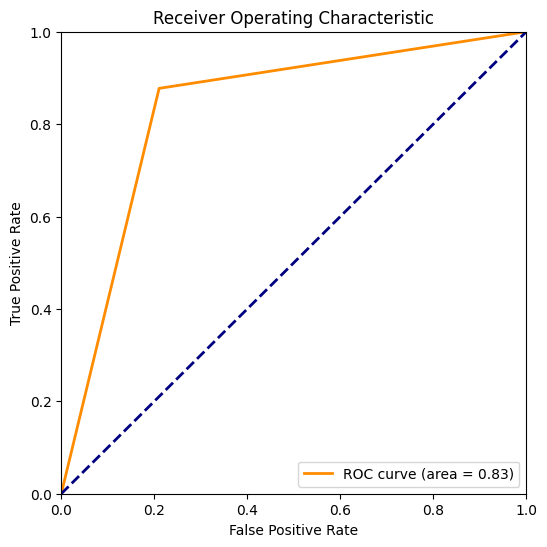

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()